# Lead Scoring Case Study

Tackle the problem of improving the lead conversion rate for education company named X Education sells online courses to industry professionals.

In order to address the problem of low lead conversion rate for X Education, we proposed building a logistic regression model to assign lead scores to each lead. The lead score ranges from 0 to 100, with higher scores representing a higher likelihood of conversion (hot data) and lower scores representing a lower likelihood of conversion (cold leads). This approach helps the sales team prioritize data with a higher probability of conversion, ultimately increasing the overall conversion rate.

To achieve this goal, we followed these steps:
1.	**Data Inspection**: We inspected the dataset to understand its structure, columns, and data types. We identified categorical variables with a level called 'Select', which is equivalent to a null value and needs to be handled.

2.	**Data Cleaning**: We filled missing values or dropped rows with missing values as needed. We converted categorical variables to dummy variables and removed unnecessary columns.

3.	**Exploratory Data Analysis (EDA)**: We performed a detailed EDA, including univariate and bivariate analysis for both categorical and continuous variables. We also created a correlation heatmap and pair plot for continuous variables.

4.	**Data Preparation**: We split the data into features (X) and target (y) variables and further divided it into training and testing sets. We also standardized the data using a StandardScaler.

5.	**Model Building**: We built a logistic regression model, fitted it to the training data, and made predictions on the test data.

6.	**Model Evaluation**: We evaluated the model using a confusion matrix, classification report, and accuracy score. We ensured that the model's performance met the company's target lead conversion rate of around 80%.

* **By following this approach, we successfully created a logistic regression model that assigns lead scores to each lead, helping the company target potential leads more efficiently. This model can be further fine-tuned and adapted to other algorithms if needed to improve its performance. Overall, this solution enables X Education to streamline their sales process and increase their lead conversion rate.**




## 1. Data Understanding and Preparation: 

* Explore the provided dataset and understanding the various attributes it contains.
* Identify any data quality issues such as missing values, duplicates, and inconsistencies. 
* Clean the data by handling missing values, removing duplicates, and converting categorical variables into dummy variables if necessary. 
* Document the data quality issues and the steps taken to address them.


In [326]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  , GridSearchCV  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  
from sklearn.feature_selection import RFECV  

#import stats library
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [327]:
data = pd.read_csv("leads.csv") # Replace with the actual file name  
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [328]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [329]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [330]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [331]:
# Dropping all the columns in which more than 20% of the data is missing  
threshold = 0.2 * len(data)  
  
for col in data.columns:  
    if data[col].isnull().sum() > threshold:  
        data.drop(col, axis=1, inplace=True)  
  
# Display the remaining missing values, sorted in descending order  
data.isnull().sum().sort_values(ascending=False)  

Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Newspaper                                      0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Magazine                                       0
X Education Forums                             0
Newspaper Article                              0
Lead Number                                    0
Search                                         0
Total Time Spent on 

In [332]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,Other Metro Cities,No,No,SMS Sent


d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


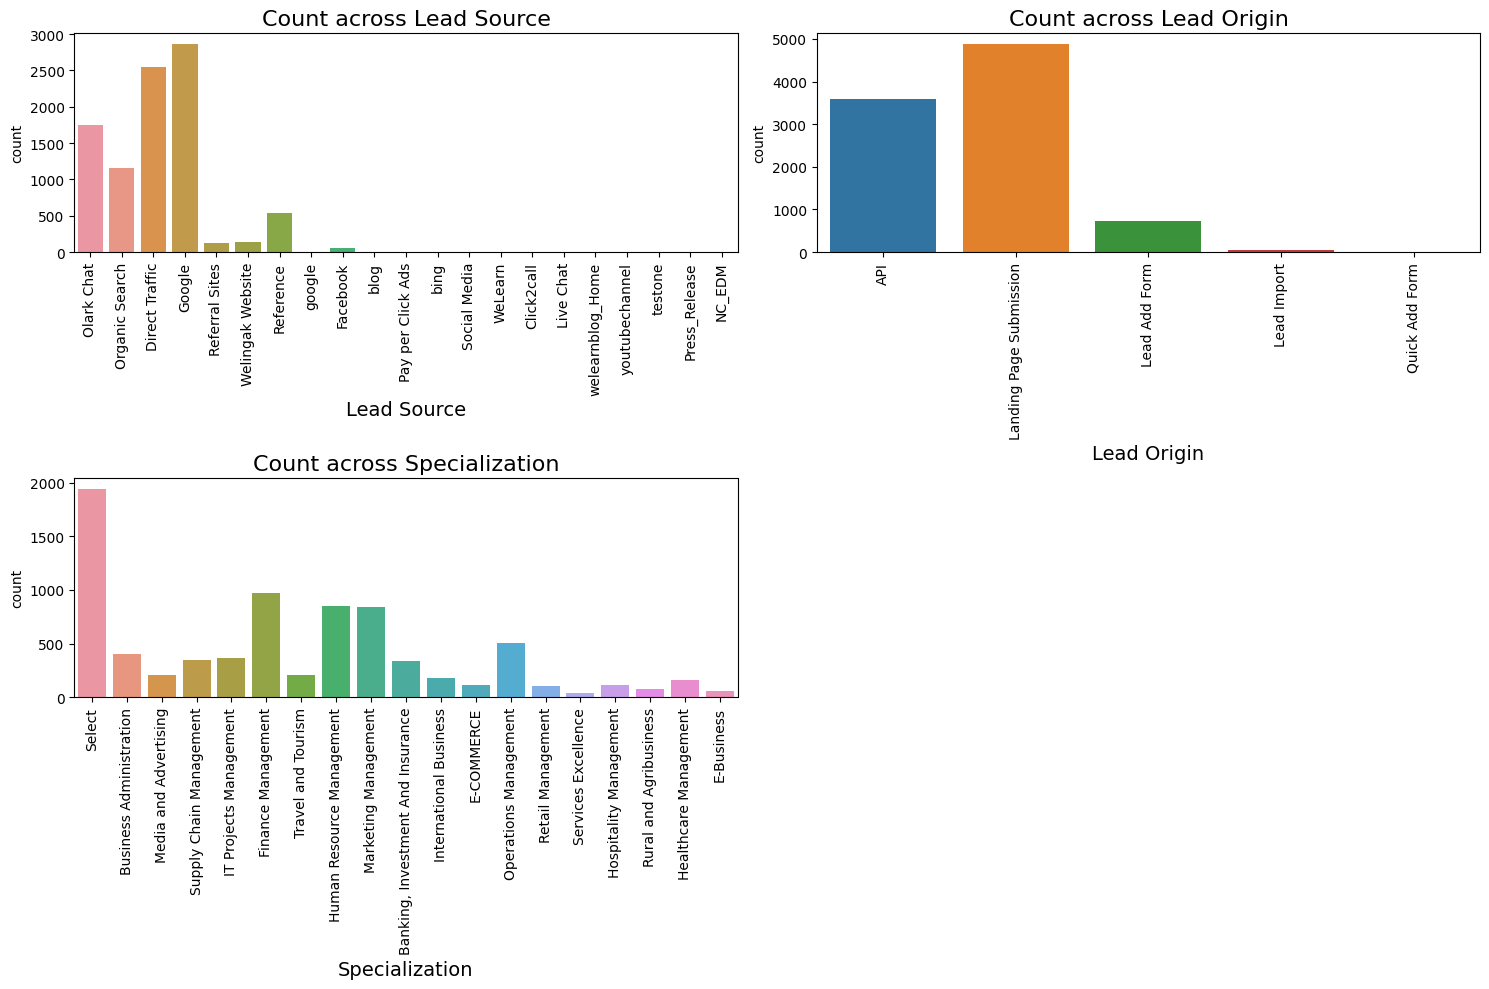

In [333]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
plt.figure(figsize=(15,10))
countplot('Lead Source',1)
countplot('Lead Origin',2)
countplot('Specialization',3)



plt.tight_layout()

In [334]:
# Fill missing values or drop rows with missing values  
# data = data.dropna()  
# Remove unnecessary columns  
data = data.drop(["Prospect ID", "Lead Number"], axis=1)  
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,...,No,No,No,No,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,No,No,No,No,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,No,No,No,No,No,No,Other Metro Cities,No,No,SMS Sent


In [335]:
data.isnull().sum().sort_values(ascending=False)

Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Lead Origin                                    0
Digital Advertisement                          0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Newspaper Article                              0
Newspaper                                      0
X Education Forums                             0
Magazine                                       0
Search                                         0
Total Time Spent on Website                    0
Converted           

In [336]:
 
cat_cols = data.select_dtypes(include='object').columns  
for col in cat_cols:  
    print(col)
    print(data[col].value_counts())
    print()


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Last Activity
Email Opened                    3437
SMS Sent     

we can drop columns with have 99% same values 

like :  Search, Magazine, Newspaper Article, X Education Forums ,etc

In [337]:
# Identify columns with 95% or more of the same values  
threshold = 0.95 * len(data)  
highly_imbalanced_cols = []  
  
cat_cols = data.select_dtypes(include='object').columns  
for col in cat_cols:  
    value_counts = data[col].value_counts()  
    max_count = value_counts.max()  
      
    if max_count >= threshold:  
        highly_imbalanced_cols.append(col)  
        print(col)  
        print(value_counts)  
        print()  
  
print("Columns with 95% or more of the same values:", highly_imbalanced_cols)  


Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Search
No     9226
Yes      14
Name: Search, dtype: int64

Magazine
No    9240
Name: Magazine, dtype: int64

Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64

X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64

Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64

Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64

Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64

I agree to pay the amount through cheque
No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Col

In [338]:
data = data.drop(highly_imbalanced_cols, axis=1)  
data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other Metro Cities,No,SMS Sent


In [339]:
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [340]:
data = data.drop('City', axis=1)
data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,No,SMS Sent


d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


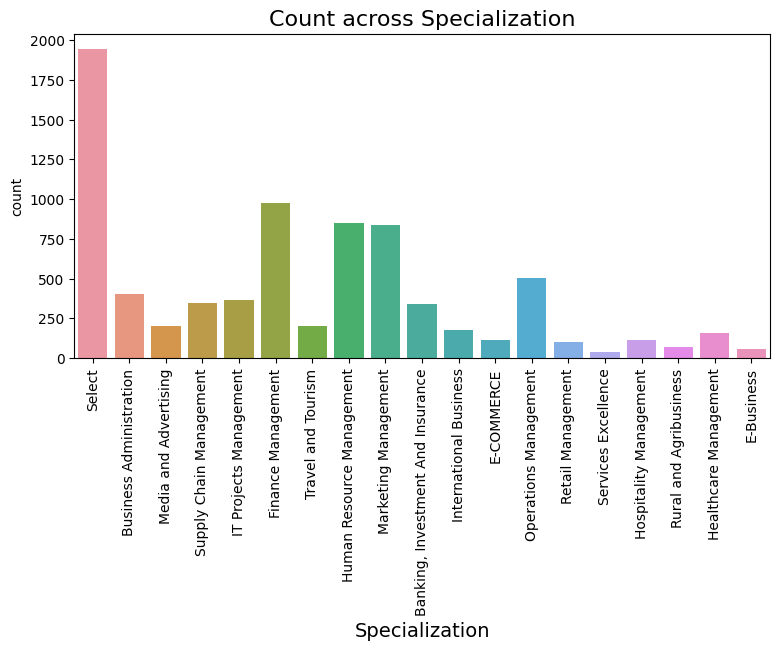

In [341]:
# columns with select value

def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('Specialization',2)



plt.tight_layout()

level called `'Select'` which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [342]:
# Identify columns with the value 'Select'  
cols_with_select = []  
  
for col in data.columns:  
    select_count = (data[col] == 'Select').sum()  
      
    if select_count > 0:  
        cols_with_select.append(col)  
        print(col)  
        print(f"Count of 'Select': {select_count}")  
        print(data[col].value_counts())  
        print()  
  
print("Columns with 'Select' values:", cols_with_select)  


Specialization
Count of 'Select': 1942
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Columns with 'Select' values: ['Specialization']


In [343]:
# Drop rows where the value is 'Select' in the 'Specialization' column  
data = data[data['Specialization'] != 'Select']  

data['Specialization'].value_counts()  


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [344]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                0.00
Lead Source                                0.11
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.93
Total Time Spent on Website                0.00
Page Views Per Visit                       0.93
Last Activity                              0.67
Specialization                            19.70
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [345]:
data = data.dropna()

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Exploratory Data Analysis (EDA): 

 * Perform EDA to identify trends, patterns, and relationships between the variables in the dataset. 
 * Understand which features might be important for predicting lead conversion.

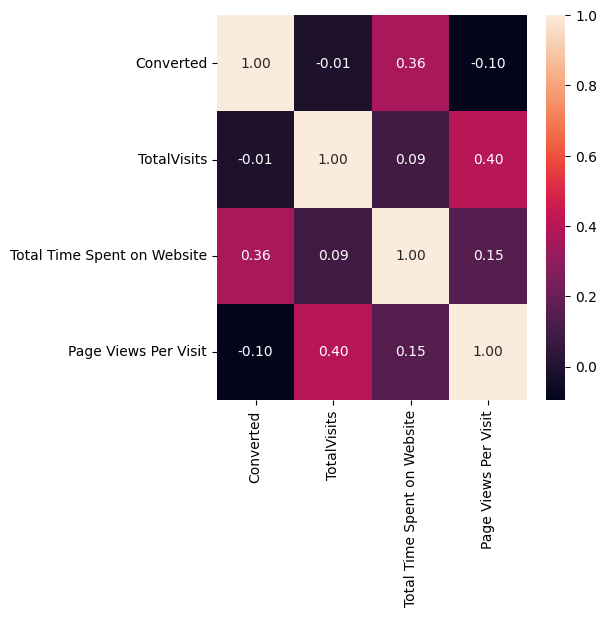

In [346]:
# Create correlation heatmap  
plt.figure(figsize=(5, 5))  
sns.heatmap(data.corr(), annot=True, fmt=".2f")  
plt.show()  


### Univariate analysis for categorical variables 

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


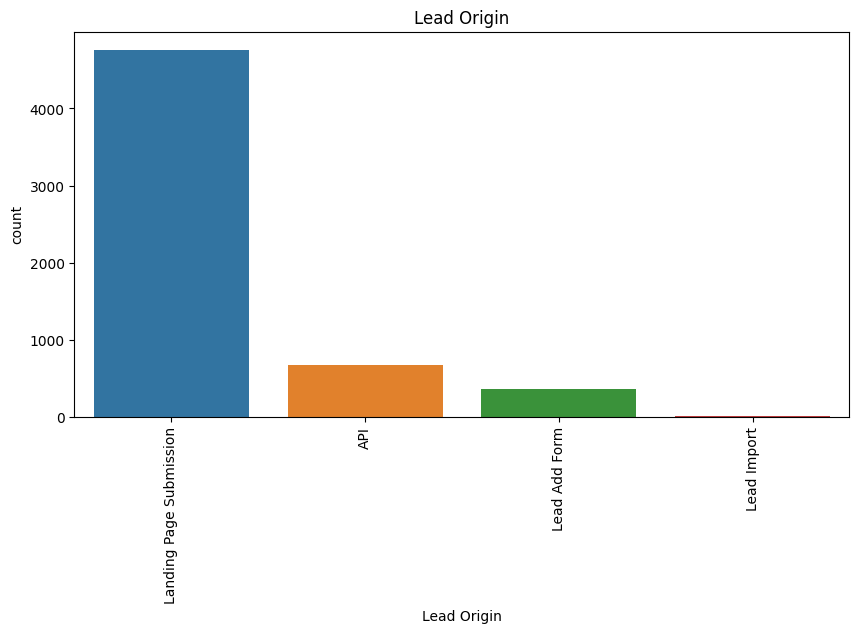

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


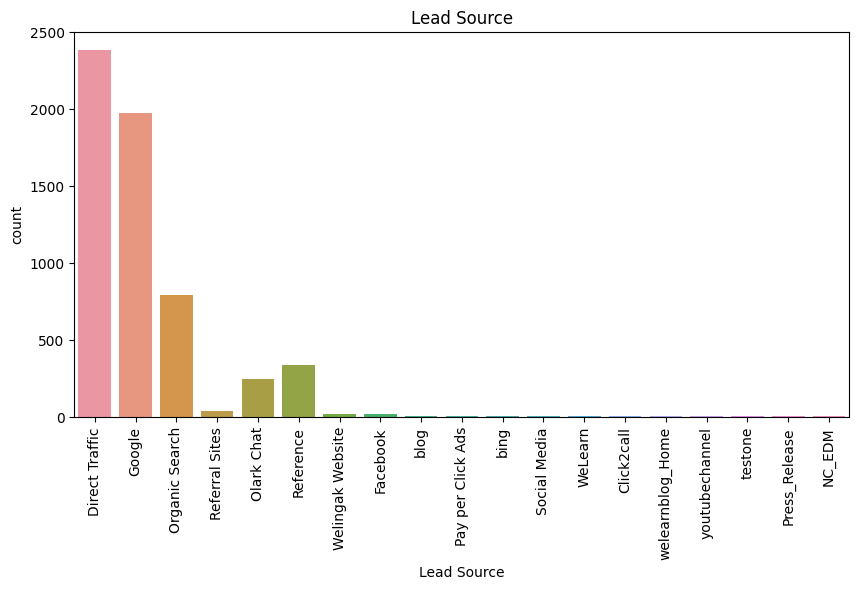

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


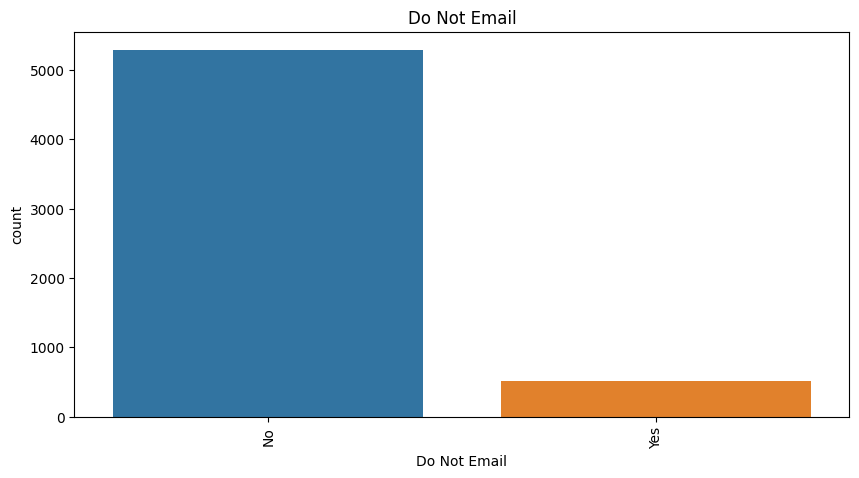

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


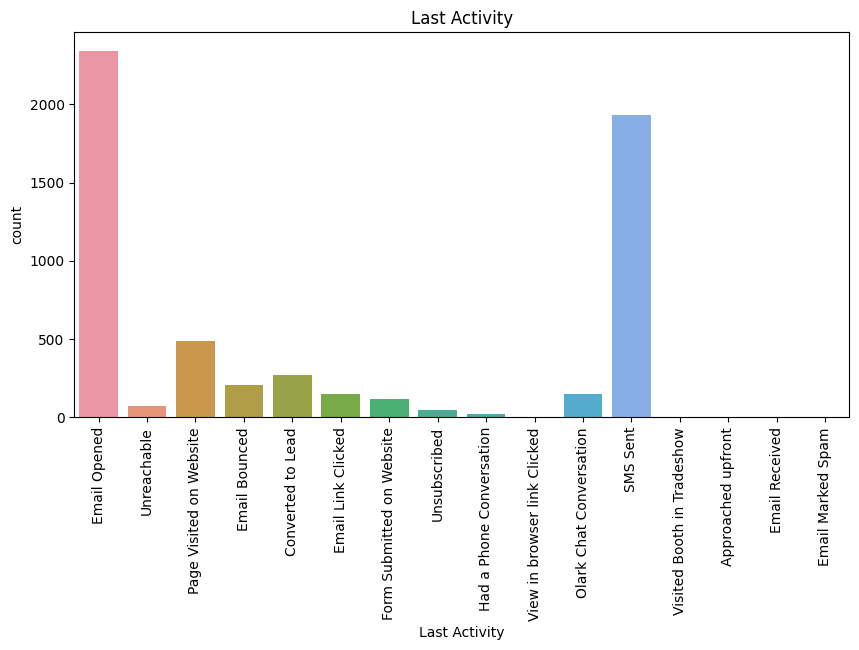

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


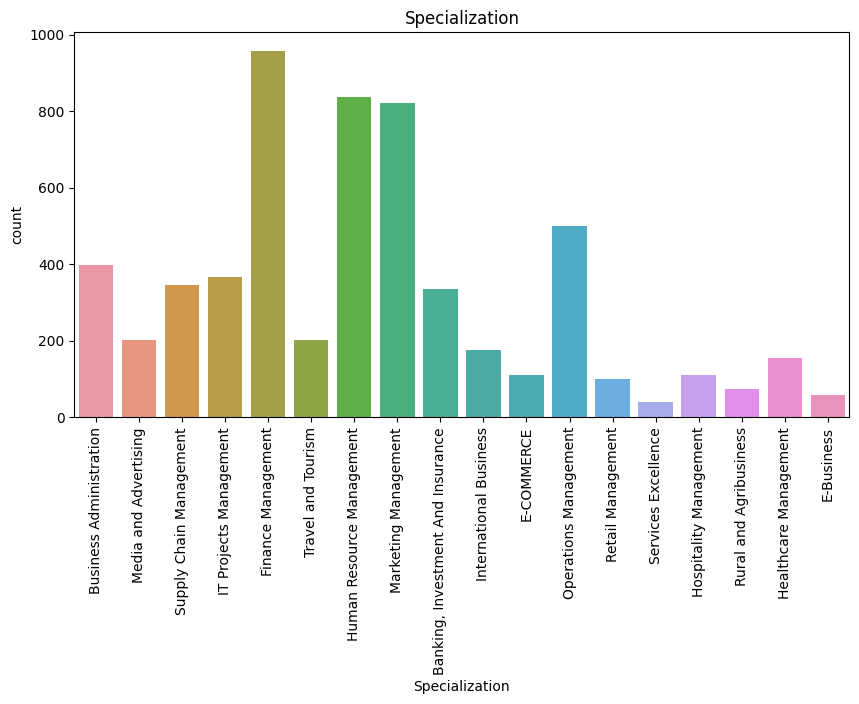

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


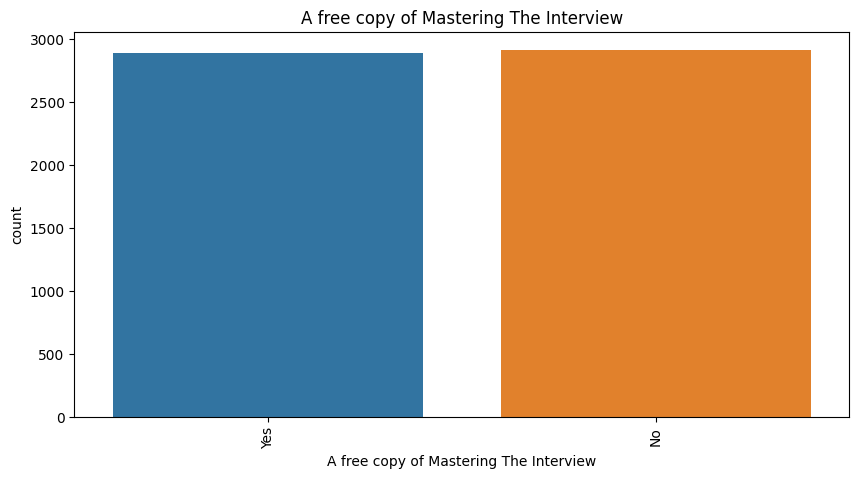

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


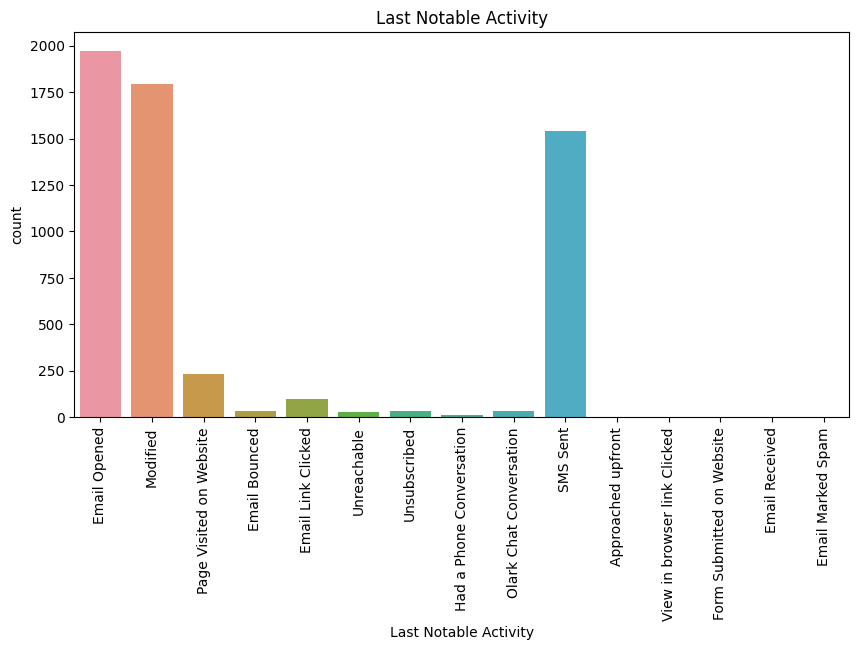

In [347]:
  
# Univariate analysis for categorical variables  
cat_cols = data.select_dtypes(include='object').columns  
for col in cat_cols:  
    plt.figure(figsize=(10, 5))  
    sns.countplot(data[col])  
    plt.title(col)  
    plt.xticks(rotation=90)  
    plt.show()  


### Univariate analysis for continuous variables 

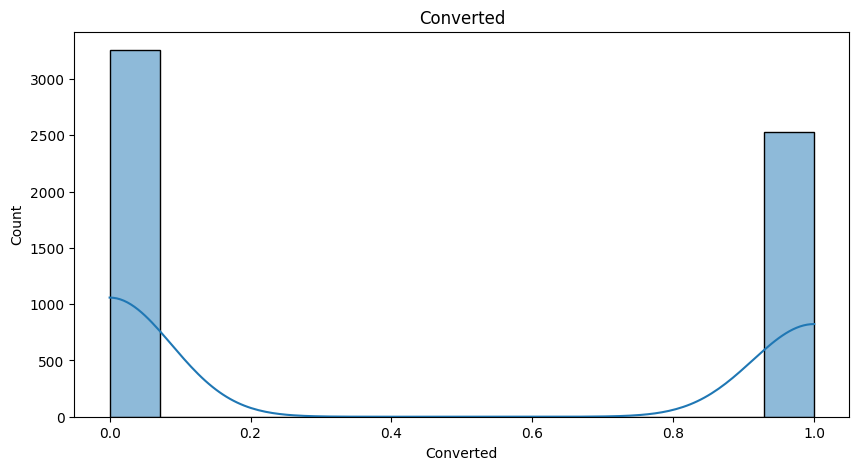

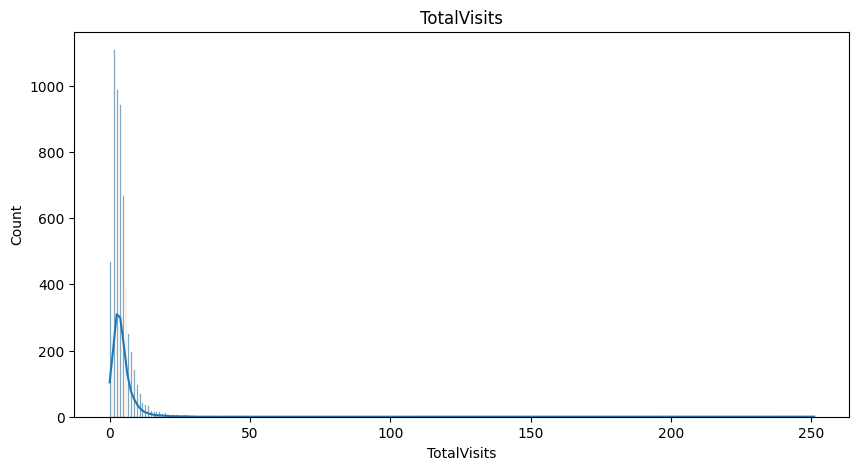

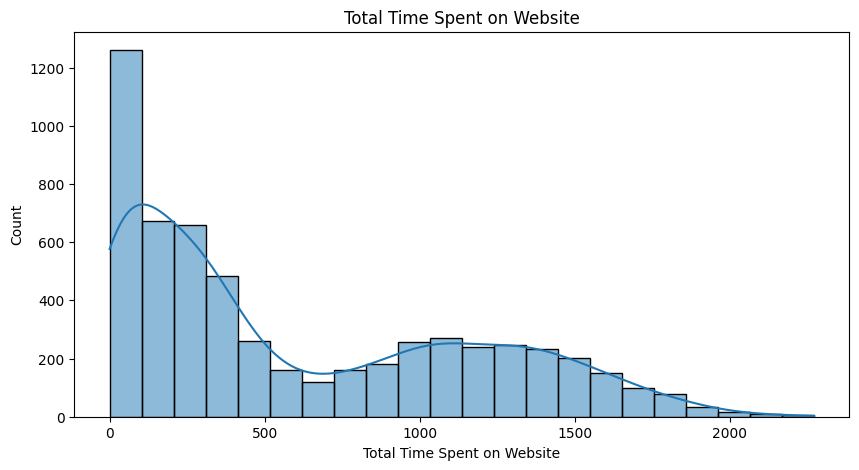

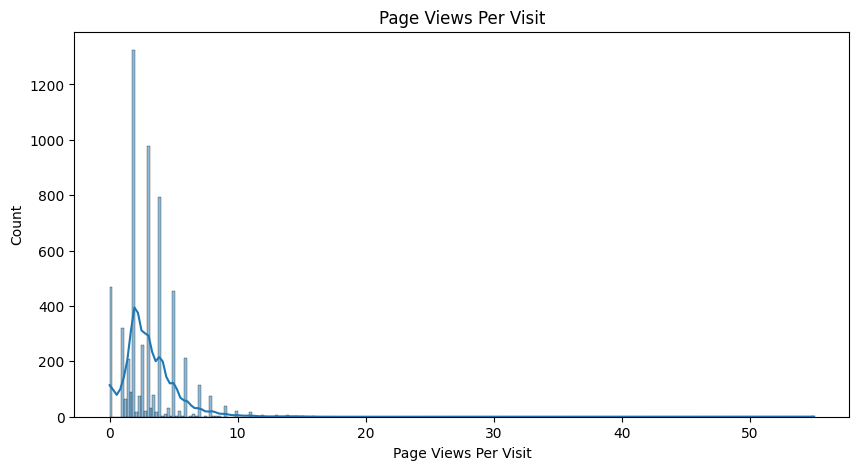

In [348]:
# Univariate analysis for continuous variables  
num_cols = data.select_dtypes(include=['float64', 'int64']).columns  
for col in num_cols:  
    plt.figure(figsize=(10, 5))  
    sns.histplot(data[col], kde=True)  
    plt.title(col)  
    plt.show()  
 

### Bivariate analysis for categorical variables vs target variable

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


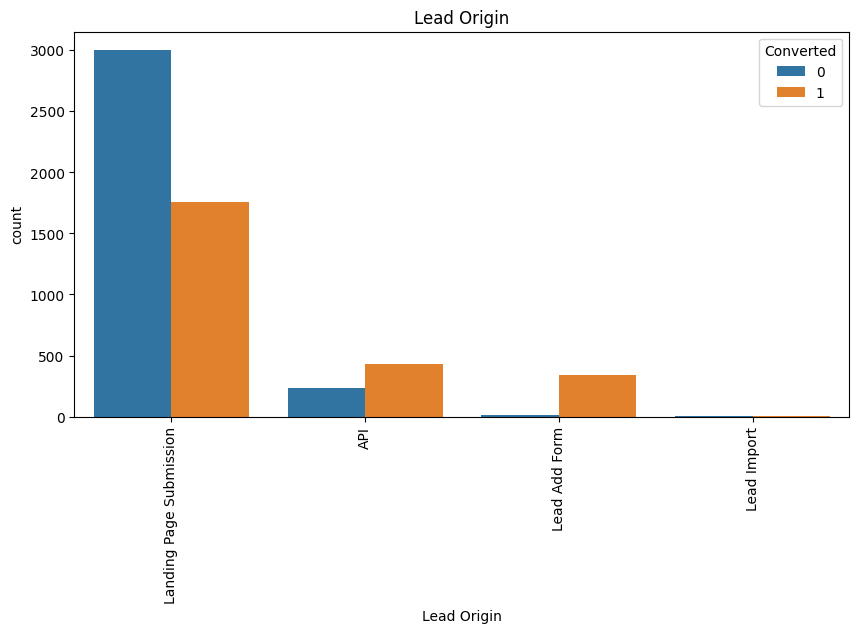

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


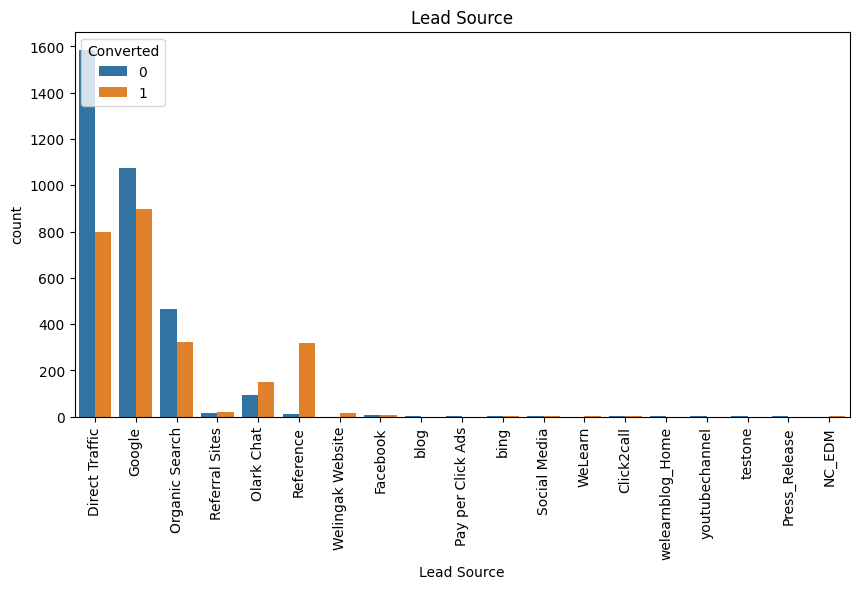

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


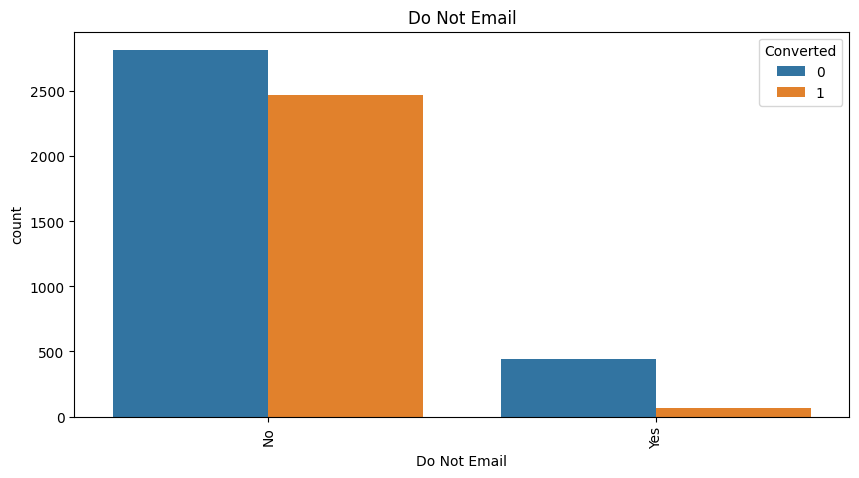

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


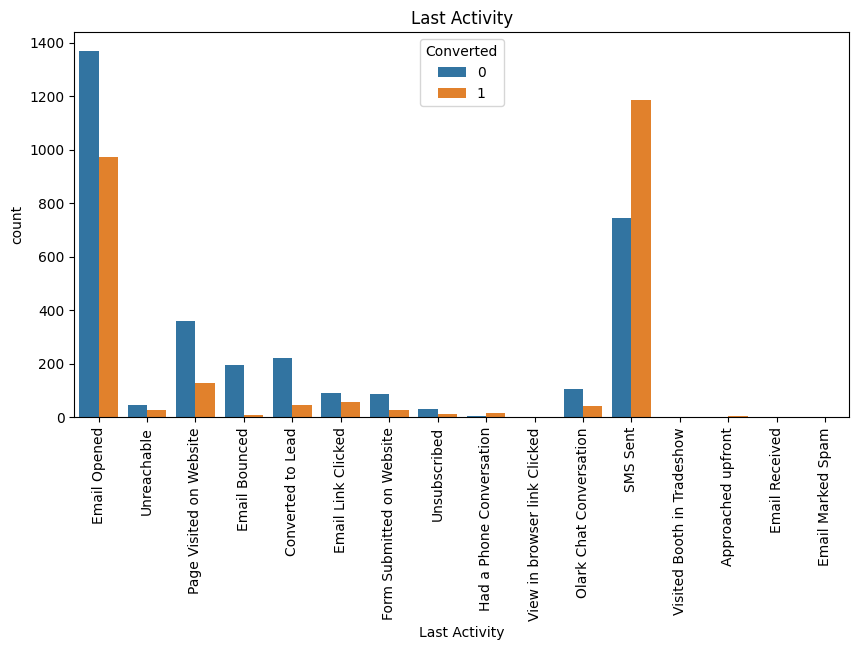

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


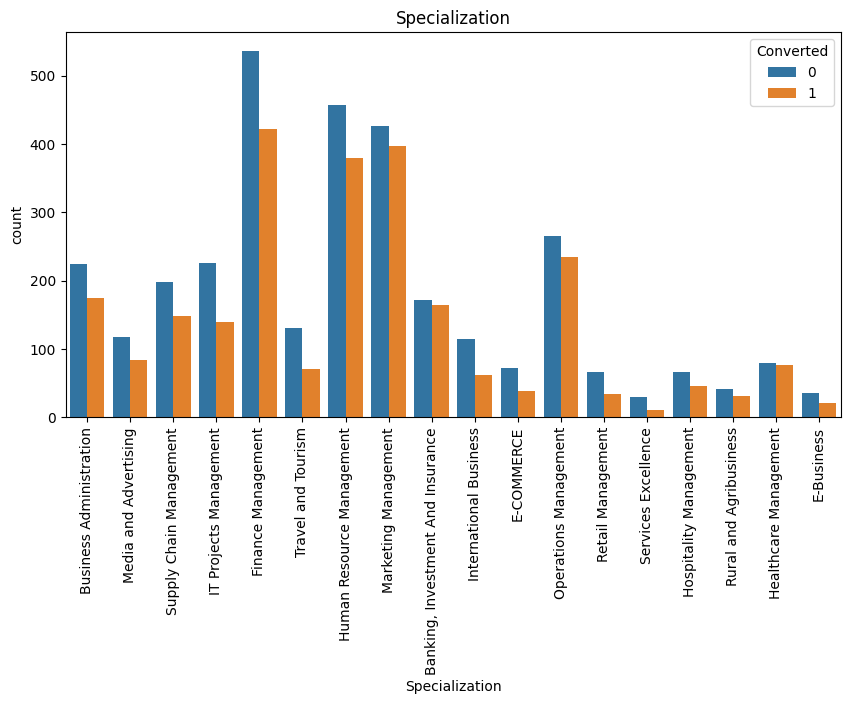

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


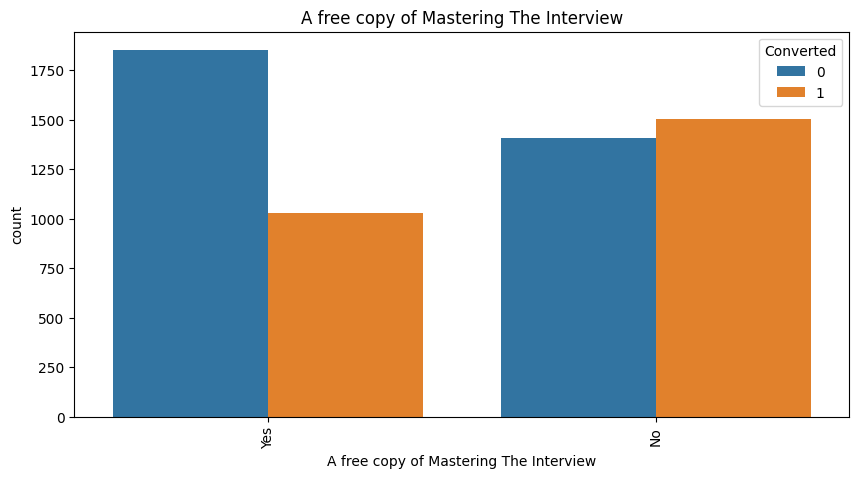

d:\Anaconda3\envs\ml2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


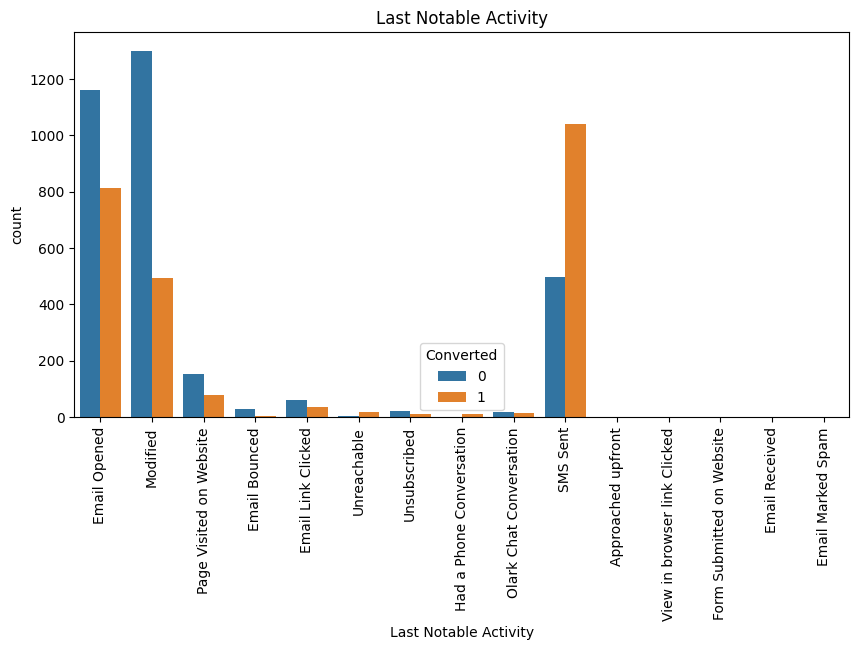

In [349]:
# Bivariate analysis for categorical variables vs target variable  
target_col = 'Converted'  
for col in cat_cols:  
    plt.figure(figsize=(10, 5))  
    sns.countplot(data[col], hue=data[target_col])  
    plt.title(col)  
    plt.xticks(rotation=90)  
    plt.show() 

### Bivariate analysis for continuous variables vs target variable

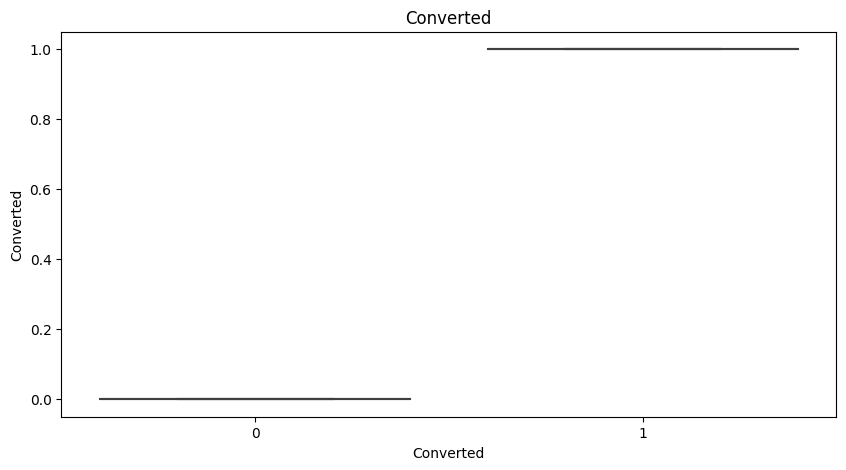

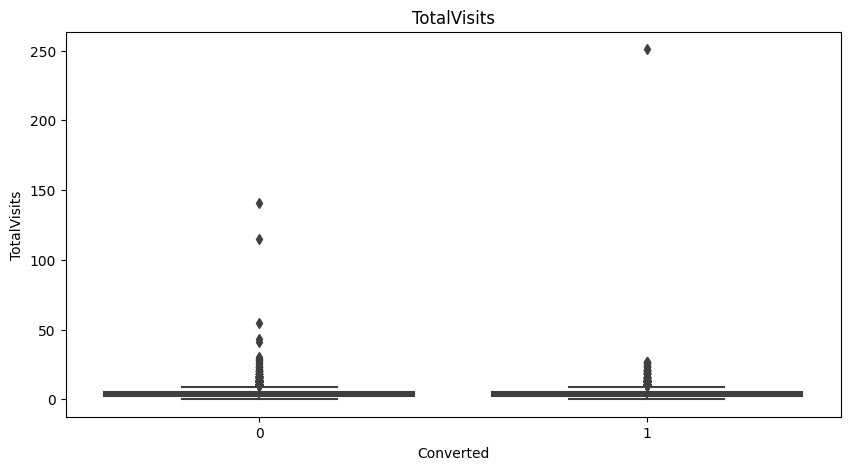

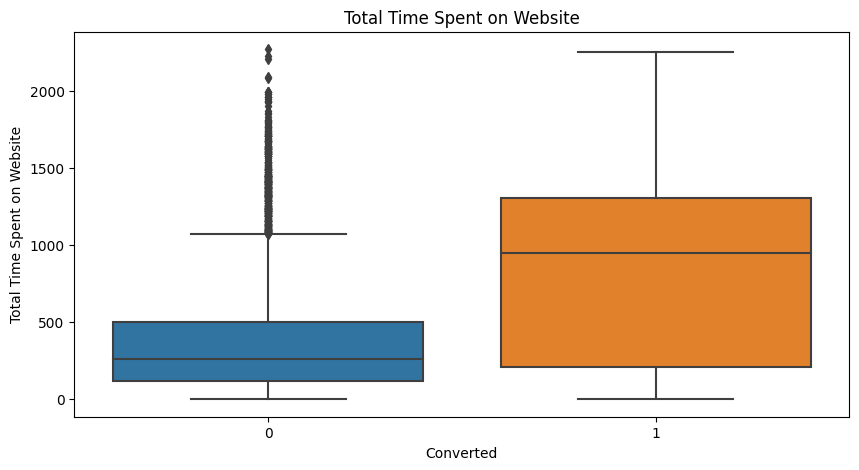

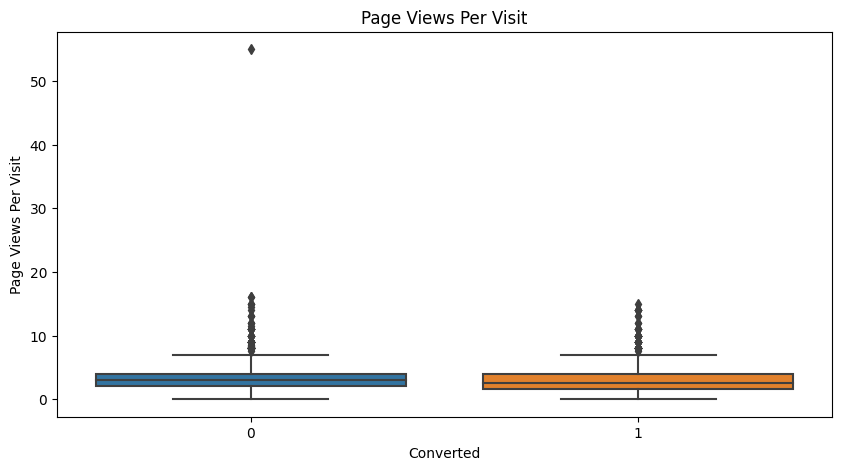

In [350]:
# Bivariate analysis for continuous variables vs target variable  
for col in num_cols:  
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=data[target_col], y=data[col])  
    plt.title(col)  
    plt.show()  

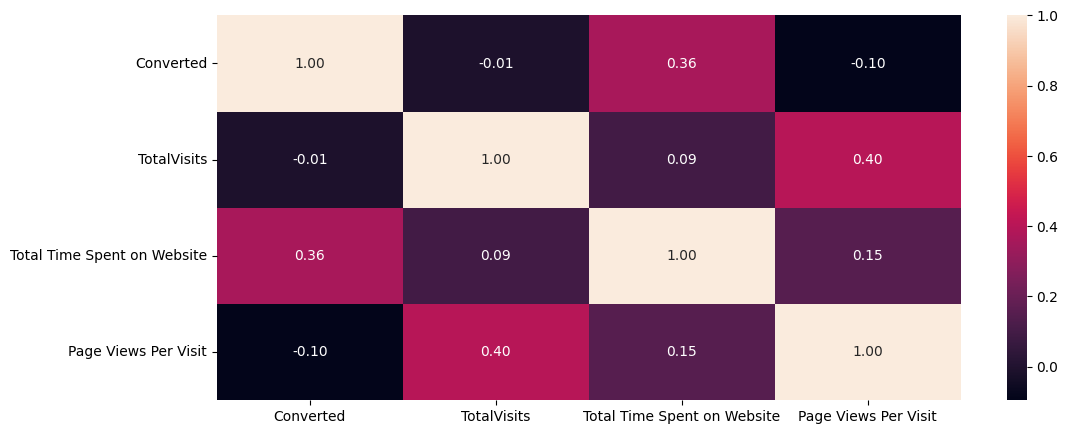

In [351]:
# Correlation heatmap for continuous variables  
plt.figure(figsize=(12, 5))  
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f")  
plt.show()  

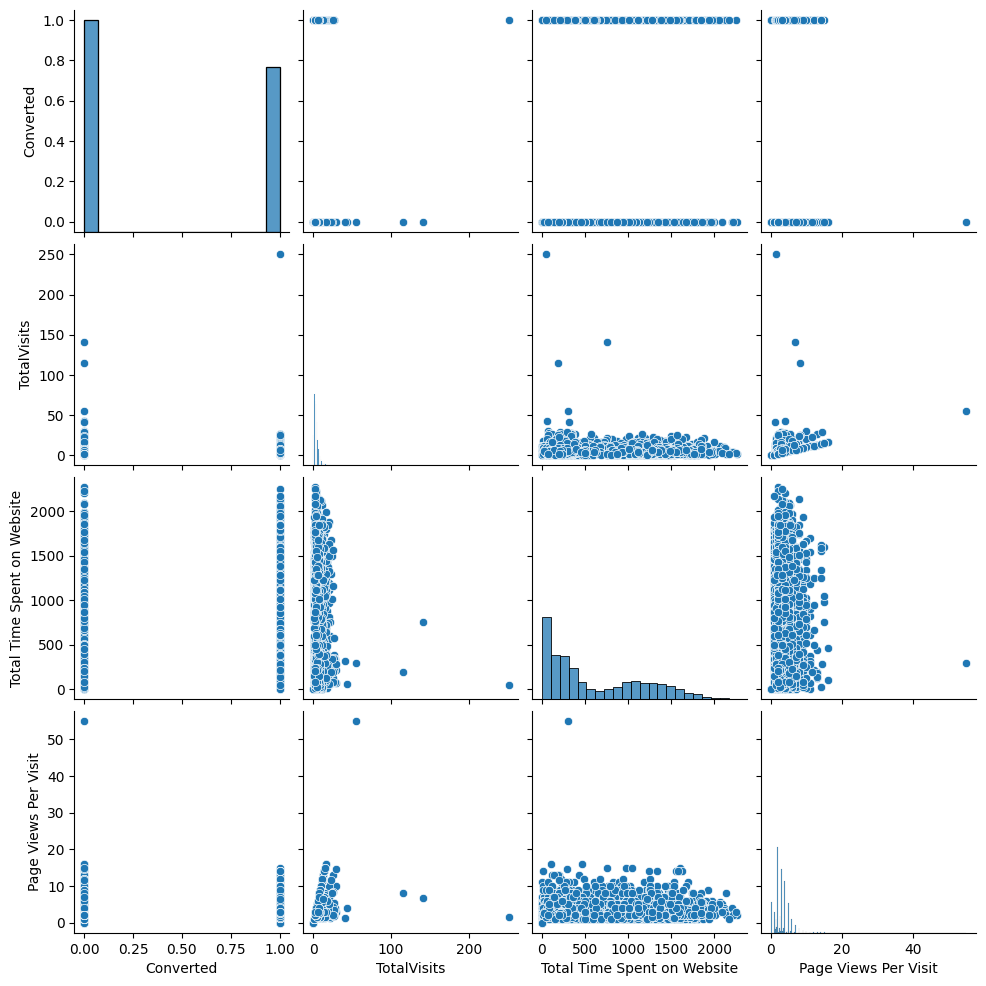

In [352]:
# Pair plot for continuous variables  
sns.pairplot(data[num_cols])  
plt.show()  

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5792 non-null   object 
 1   Lead Source                             5792 non-null   object 
 2   Do Not Email                            5792 non-null   object 
 3   Converted                               5792 non-null   int64  
 4   TotalVisits                             5792 non-null   float64
 5   Total Time Spent on Website             5792 non-null   int64  
 6   Page Views Per Visit                    5792 non-null   float64
 7   Last Activity                           5792 non-null   object 
 8   Specialization                          5792 non-null   object 
 9   A free copy of Mastering The Interview  5792 non-null   object 
 10  Last Notable Activity                   5792 non-null   obje

In [354]:
# Identify columns with 95% or more of the same values  
threshold = 0.95 * len(data)  
highly_imbalanced_cols = []  
  
cat_cols = data.select_dtypes(include='object').columns  
for col in cat_cols:  
    value_counts = data[col].value_counts()  
    max_count = value_counts.max()
    print(col)  
    print(value_counts)  
    print()    
      
    if max_count >= threshold:  
        highly_imbalanced_cols.append(col)  

  
print("Columns with 95% or more of the same values:", highly_imbalanced_cols)  


Lead Origin
Landing Page Submission    4760
API                         665
Lead Add Form               353
Lead Import                  14
Name: Lead Origin, dtype: int64

Lead Source
Direct Traffic       2381
Google               1969
Organic Search        787
Reference             332
Olark Chat            242
Referral Sites         35
Welingak Website       15
Facebook               14
Click2call              4
Press_Release           2
bing                    2
Social Media            2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
No     5286
Yes     506
Name: Do Not Email, dtype: int64

Last Activity
Email Opened                    2344
SMS Sent                        1932
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    205
Email Link Clicked

In [355]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [356]:
data['Do Not Email'].value_counts()

No     5286
Yes     506
Name: Do Not Email, dtype: int64


### Feature Selection: 
 * Use appropriate feature selection techniques to select the most important variables for building the model. 
 * Include correlation analysis, recursive feature elimination.

In [357]:
# Convert categorical variables to dummy variables  
data = pd.get_dummies(data, drop_first=True).reset_index()  
data

,index,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,2,1,2.0,1532,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1.0,305,1.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,6,1,2.0,1640,2.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8,0,2.0,71,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,4.0,58,4.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,9235,1,8.0,1845,2.67,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5788,9236,0,2.0,238,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5789,9237,0,2.0,199,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5790,9238,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [358]:
for col in data.columns:  
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':  
        data[col].fillna(data[col].mean(), inplace=True)  


## Model Building and Evaluation : 
 * Build a logistic regression model to predict lead conversion using the selected features. 
 * Split the dataset into training and testing sets and use cross-validation to tune the model parameters. 
 * The model lead score between 0 and 100 to each lead, with higher scores indicat higher likelihood of conversion.

In [359]:
# Split data into features (X) and target (y)  
X = data.drop("Converted", axis=1)  
y = data["Converted"]  
  
# Split data into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
  
# Standardize the data  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  


In [360]:
# Create and fit the model  
log_reg = LogisticRegression()  
log_reg.fit(X_train, y_train)  
  
# Make predictions  
y_pred = log_reg.predict(X_test)  

# Print confusion matrix, classification report, and accuracy score  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
print("\nClassification Report:\n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))  


Confusion Matrix:
 [[808 168]
 [225 537]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       976
           1       0.76      0.70      0.73       762

    accuracy                           0.77      1738
   macro avg       0.77      0.77      0.77      1738
weighted avg       0.77      0.77      0.77      1738

Accuracy Score:  0.7738780207134638


### Recursive Feature Elimination with Cross-Validation (RFECV)  

In [361]:
  
# Recursive Feature Elimination with Cross-Validation (RFECV)  
model = LogisticRegression(max_iter=1000)  
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')  
rfecv.fit(X, y)  
print("Optimal number of features:", rfecv.n_features_)  
print("Selected features:", X.columns[rfecv.support_])  

Optimal number of features: 73
Selected features: Index(['index', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last

In [373]:
# Train the model with selected features
X_train, X_test, y_train, y_test = train_test_split(X[X.columns[rfecv.support_]], y, test_size=0.2, random_state=42)  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  

model = LogisticRegression(max_iter=1000)    
params = {'C': np.logspace(-4, 4, 20)}  
grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)  
best_model = grid_search.best_estimator_  


In [374]:
# Model Evaluation  
y_pred = best_model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
roc_auc = roc_auc_score(y_test, y_pred)  
cm = confusion_matrix(y_test, y_pred)  
report = classification_report(y_test, y_pred)  
  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1-score:', f1)  
print('ROC AUC:', roc_auc)  
print('Confusion Matrix:\n', cm)  
print('Classification Report:\n', report)  

Accuracy: 0.7765314926660914
Precision: 0.7687366167023555
Recall: 0.703921568627451
F1-score: 0.7349027635619243
ROC AUC: 0.7687558536511677
Confusion Matrix:
 [[541 108]
 [151 359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       649
           1       0.77      0.70      0.73       510

    accuracy                           0.78      1159
   macro avg       0.78      0.77      0.77      1159
weighted avg       0.78      0.78      0.78      1159



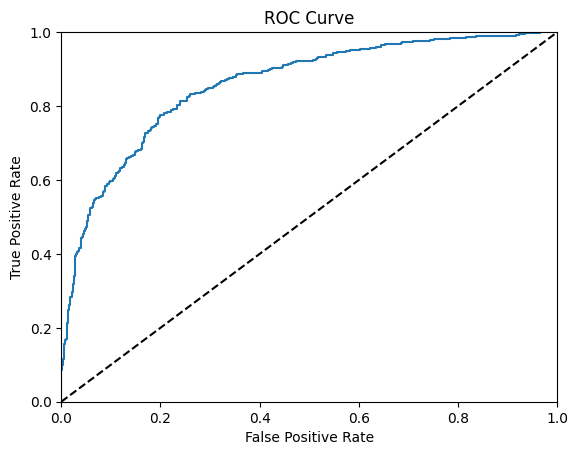

In [375]:
# ROC Curve  
y_pred_prob = best_model.predict_proba(X_test)[:,1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  
plt.plot(fpr, tpr)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')  
plt.show() 

### Exprement with new Feature selection with SelectKBest and Chi2 based on exploration

In [376]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import chi2  

k=20
# Assume X and y are your feature matrix and target vector, respectively  
X_new = SelectKBest(chi2, k=k).fit_transform(X, y)  
  
# Get the selected features  
selector = SelectKBest(chi2, k=k).fit(X, y)  
selected_features = X.columns[selector.get_support()]  
  
print("Selected features:", selected_features)  


Selected features: Index(['index', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [377]:
# Train the model with selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
  

model = LogisticRegression(max_iter=1000)    
params = {'C': np.logspace(-4, 4, 20)}  
grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)  
best_model = grid_search.best_estimator_ 

# Model Evaluation  
y_pred = best_model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
roc_auc = roc_auc_score(y_test, y_pred)  
cm = confusion_matrix(y_test, y_pred)  
report = classification_report(y_test, y_pred)  
  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1-score:', f1)  
print('ROC AUC:', roc_auc)  
print('Confusion Matrix:\n', cm)  
print('Classification Report:\n', report)  

Accuracy: 0.7791199309749784
Precision: 0.7702127659574468
Recall: 0.7098039215686275
F1-score: 0.7387755102040817
ROC AUC: 0.771697030121756
Confusion Matrix:
 [[541 108]
 [148 362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       649
           1       0.77      0.71      0.74       510

    accuracy                           0.78      1159
   macro avg       0.78      0.77      0.77      1159
weighted avg       0.78      0.78      0.78      1159



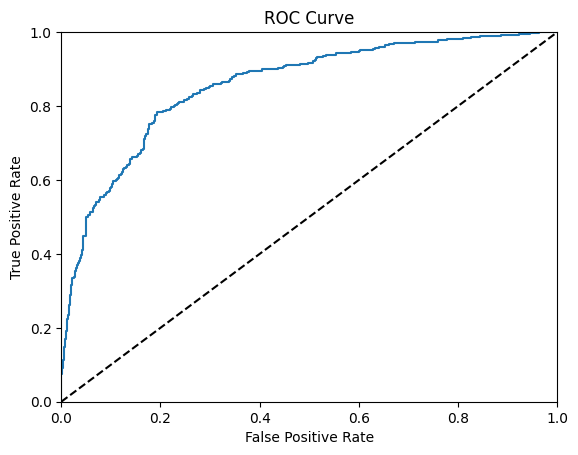

In [378]:
# ROC Curve  
y_pred_prob = best_model.predict_proba(X_test)[:,1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  
plt.plot(fpr, tpr)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')  
plt.show() 

### Final Model Evaluation: 
 * Evaluate the performance of the logistic regression model using appropriate metrics, such as accuracy, precision, recall, and F1-score. 

In [379]:
# Print confusion matrix, classification report, and accuracy score  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
print("\nClassification Report:\n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))  


Confusion Matrix:
 [[541 108]
 [148 362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       649
           1       0.77      0.71      0.74       510

    accuracy                           0.78      1159
   macro avg       0.78      0.77      0.77      1159
weighted avg       0.78      0.78      0.78      1159

Accuracy Score:  0.7791199309749784


In [382]:
from sklearn.metrics import precision_recall_curve, average_precision_score  

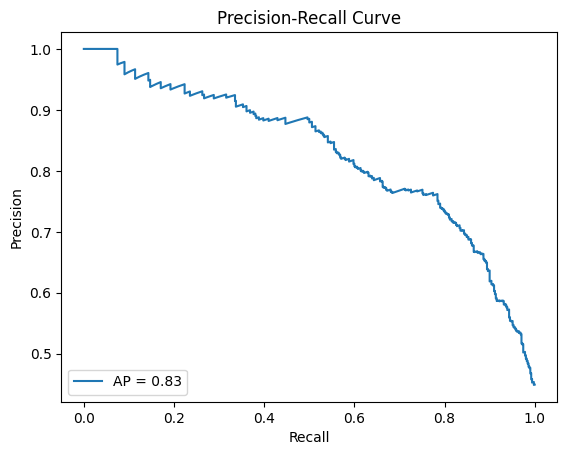

In [383]:
# Calculate predicted probabilities  
y_scores = best_model.predict_proba(X_test)[:, 1]  
  
# Compute the precision-recall curve  
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)  
  
# Calculate average precision score  
average_precision = average_precision_score(y_test, y_scores)  
  
# Plot the precision-recall curve  
plt.figure()  
plt.plot(recall, precision, label=f'AP = {average_precision:0.2f}')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.title('Precision-Recall Curve')  
plt.legend(loc='lower left')  
plt.show() 

Higher AP indicates better performance of the model in terms of both precision and recall. It signifies that, on average, the model achieves 83% precision throughout the range of recall values.